In [1]:
import torch
import os
import pandas as pd
os.chdir('/home/yuanyuan/scripts/test_Chrombus_pyG/')


In [2]:

from Chrombus_pyG.model_utils_pyG import get_models_pe,train,test
from Chrombus_pyG.model_utils_pyG import load_chrombus_data,load_chrombus_data_singlechrom_pe, getEdgeIndex

In [3]:

datapath = './data/'
train_chr = 1
test_chr = 2
outpath = './example/'
modelpath = './example/'


In [4]:
train_loader = load_chrombus_data_singlechrom_pe(datapath,train_chr,outpath,N_chr=200)
test_loader = load_chrombus_data_singlechrom_pe(datapath,test_chr,outpath,N_chr=50)

In [5]:
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')


1.Model Training

In [6]:
model = get_models_pe()
model.to(device)

GAE(
  (encoder): EdgeConvEncoder_PE(
    (pe): Embedding(128, 14)
    (lin): Linear(in_features=12, out_features=14, bias=True)
    (conv0): DynamicEdgeConv()
    (conv1): DynamicEdgeConv()
    (conv2): DynamicEdgeConv()
  )
  (decoder): EdgeConvDecoder(
    (decoder): InnerProductDecoder()
    (linear): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [ ]:

max_span = 64
lr = 1e-2
epochs = 10 #500
result = []

for epoch in range(epochs):
    train(model,train_loader, max_span=max_span,lr = lr)
    train_mse,train_cor = test(model,train_loader, max_span=max_span)
    test_mse,test_cor = test(model,test_loader, max_span=max_span)
    result.append([train_mse, train_cor, test_mse, test_cor])
    print('Epoch: {}, Train Loss:{:.3f}, Train Cor:{:.3f}, Test Loss:{:.3f}, Test Cor:{:3f}'.format(epoch, train_mse.item(),train_cor, test_mse.item(), test_cor))
    

Epoch: 0, Train Loss:0.738, Train Cor:0.100, Test Loss:0.602, Test Cor:0.102091
Epoch: 1, Train Loss:0.644, Train Cor:0.364, Test Loss:0.512, Test Cor:0.384748
Epoch: 2, Train Loss:0.605, Train Cor:0.433, Test Loss:0.496, Test Cor:0.451484
Epoch: 3, Train Loss:0.506, Train Cor:0.565, Test Loss:0.415, Test Cor:0.566782
Epoch: 4, Train Loss:0.411, Train Cor:0.669, Test Loss:0.352, Test Cor:0.657116
Epoch: 5, Train Loss:0.339, Train Cor:0.739, Test Loss:0.299, Test Cor:0.718713
Epoch: 6, Train Loss:0.293, Train Cor:0.779, Test Loss:0.272, Test Cor:0.755971
Epoch: 7, Train Loss:0.255, Train Cor:0.811, Test Loss:0.247, Test Cor:0.788676
Epoch: 8, Train Loss:0.244, Train Cor:0.820, Test Loss:0.239, Test Cor:0.796709
Epoch: 9, Train Loss:0.225, Train Cor:0.836, Test Loss:0.223, Test Cor:0.815115


2. Load trained model

In [6]:
model = get_models_pe()
model.to(device)
state = torch.load('./example/model_epoch424.Nseg128.chrombus.pe.pkl')
model.load_state_dict(state['model'])
max_span = 64


3. Predicting

In [6]:
from Chrombus_pyG.model_utils_pyG import get_region_pred

In [7]:
chrom = 2
start = 175000000
end = 177000000
modelpath='./example/model_epoch424.Nseg128.chrombus.pe.pkl'
result = get_region_pred(modelpath,chrom=chrom, start = start, end = end,datapath=datapath,outpath=outpath)

In [8]:
result

,from,to,pred,v_chr,v_start1,v_end1,v_start2,v_end2,dist,chrom,hic
0,2134,2134,2.433024,2,172349665,172610087,172349665,172610087,-260422.450216,2,3.780976
1,2134,2135,2.591397,2,172349665,172610087,172610087,172613763,0.000000,2,NaN
2,2134,2136,2.497983,2,172349665,172610087,172613763,172615468,3675.734458,2,NaN
3,2134,2137,2.575190,2,172349665,172610087,172615468,172632317,5380.653827,2,2.526540
4,2134,2138,2.188156,2,172349665,172610087,172632317,172741190,22229.678834,2,1.726456
...,...,...,...,...,...,...,...,...,...,...,...
8251,2259,2260,2.592839,2,179339067,179381346,179381346,179460346,0.000000,2,3.116882
8252,2259,2261,2.642057,2,179339067,179381346,179460346,179530197,78999.908723,2,2.369203
8253,2260,2260,2.335359,2,179381346,179460346,179381346,179460346,-78999.908723,2,4.622197
8254,2260,2261,2.368723,2,179381346,179460346,179460346,179530197,0.000000,2,2.726599


In [9]:
result[['pred','hic']].corr()

,pred,hic
pred,1.000000,0.891197
hic,0.891197,1.000000


(-0.20282702445983888,
 4.259367513656616,
 -0.9118460413021618,
 6.592164323574443)

<Figure size 800x640 with 0 Axes>

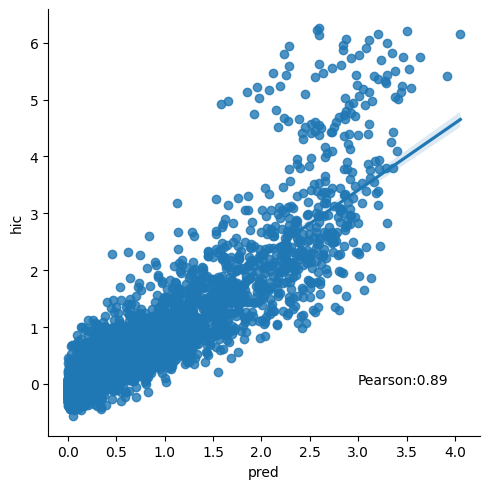

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
fig1 = sns.lmplot(x = 'pred', y = 'hic', data = result)
plt.text(3,0,"Pearson:{:.2f}".format(result[['pred','hic']].corr().iloc[1,0]))
plt.axis('on')

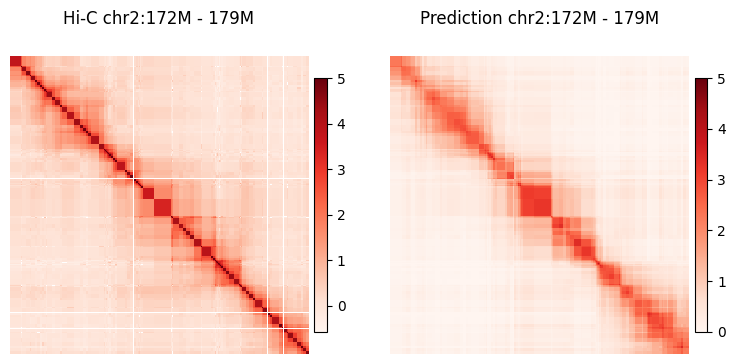

In [11]:
from Chrombus_pyG.model_utils_pyG import hic_heatmap
hic_heatmap(result, chrom, outpath)

Predicting the chromatin interaction of chromosome 2

In [9]:
from Chrombus_pyG.model_utils_pyG import get_pred
chrom = 2
modelpath='./example/model_epoch424.Nseg128.chrombus.pe.pkl'
get_pred(model_path=modelpath,chrom=chrom,datapath=datapath,outpath=outpath)